# Лабораторная работа №3

ФИО:    Касрадзе Джамал Зурабович
Группа: БИВТ-21-5

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №7 в семестре (Занятие №3 очное)

Что необходимо сделать:  
- Обучить различного рода модели машинного обучения и сравнить их между собой  

---
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/11600OkqdRzxc-xZmFTuBs099VeAqU_GlE0Bx6bBlIRE/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. Загрузить необходимые данные к себе и считать (read) их в переменную.
2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии (**если у вас многоклассовая классификация, прочтите P.S.S. внизу**).
3. Сделать предобработку данных:  
     1. Разделить выборку на тренировочную (train) и тестовую (test). _Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test_.
     2. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.
     3. Отнормировать численные переменные (`StandardScaler`, `MinMaxScaler`).
     4. Закодировать категориальные признаки по одной из стратегий.
4. Обучить на тренировочном множестве:
     1. Линейную модель (`LogisticRegression`, `LinearRegression`)
     2. Деревянную модель (`DecisionTreeClassifier`, `DecisionTreeRegressor`) (тут советую попробовать разные глубины деревьев)
     3. K-ближайших соседей (`KNeighborsClassifier`, `KNeighborsRegressor`) (тут тоже есть смысл попробовать разные `k`)
     4. Случайный лес (`RandomForestClassifier`, `RandomForestRegressor`) 
5. Посчитайте метрики на train и test множествах:
     1. Для задачи классификации -- Accuracy, ROC-AUC (график + значение), PR-кривую (график), F1-score
     2. Для задачи регрессии -- MAE, RMSE, MAPE
6. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
     1. Какая модель справилась лучше с поставленной задачей?
     2. Имеет ли место переобучение?
     3. Имеет ли место недообучение?
     4. Как можно улучшить метрики моделей?

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

P.S.S.  
Если вам повезло с многоклассовой классификацией, вам будет необходимо понять, умеет ли алгоритм работать с несколькими классами одновременно (обычно они не умеют). Поэтому вам может понадобиться такая штука, как OneVsRestClassifier ([ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier)), но советую ознакомиться с этой [страницей](https://scikit-learn.org/stable/modules/multiclass.html), здесь представлена более полная информация.

## 1. Пример импорта данных. Грузим данные

In [34]:
import pandas as pd
data = pd.read_csv('../L2/dataset.csv', sep=',')  # если нужно, можно поменять разделитель
data = data.query("(PROPERTYSQFT != 2184.207862) & (PRICE < 10000000) & (PRICE > 100) & (PROPERTYSQFT < 10000) & (PROPERTYSQFT > 256)")
data.set_index("PRICE")

,BROKERTITLE,TYPE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
PRICE,,,,,,,,,,,,,,,,
315000,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,2,2.0,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
260000,Brokered by Sowae Corp,House for sale,4,2.0,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
69000,Brokered by COMPASS,Condo for sale,3,1.0,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
690000,Brokered by Sowae Corp,House for sale,5,2.0,4004.0,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725
265000,Brokered by Pantiga Group Inc.,Co-op for sale,1,1.0,750.0,875 Morrison Ave Apt 3M,"Bronx, NY 10473","875 Morrison Ave Apt 3MBronx, NY 10473",Bronx County,The Bronx,East Bronx,Morrison Avenue,Parking lot,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700000,Brokered by Ilite Realty Inc,Multi-family home for sale,3,7.0,7854.0,448 40th St,"Brooklyn, NY 11232","448 40th StBrooklyn, NY 11232",United States,New York,Kings County,Brooklyn,40th Street,"448 40th St, Brooklyn, NY 11232, USA",40.651222,-74.005780
945000,Brokered by Brown Harris Stevens,Condo for sale,2,2.0,903.0,2351 Adam Clayton Powell Jr Blvd Apt 614,"Manhattan, NY 10030",2351 Adam Clayton Powell Jr Blvd Apt 614Manhat...,New York,New York County,New York,Manhattan,2351,2351 Adam Clayton Powell Jr Blvd Apartment 614...,40.816711,-73.942050
2999999,Brokered by RE MAX Edge,Multi-family home for sale,15,9.0,3600.0,2825-2827 W 15th St,"Brooklyn, NY 11224","2825-2827 W 15th StBrooklyn, NY 11224",United States,New York,Kings County,Brooklyn,West 15th Street,"2825 W 15th St, Brooklyn, NY 11224, USA",40.578450,-73.982739


## 2. Понимаем, какая перед нами задача

Нам нужно предсказать единственный параметр - цену. Это задача регрессии. Будем искать зависимость цены от площади.

## 3. Делаем предобработку данных

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.preprocessing import OneHotEncoder

data = data.sample(frac=1)#shuffle

X = data.drop(['PRICE'], axis=1)
y = np.log(data['PRICE'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [77]:
X_train.apply(lambda x: x.nunique())

BROKERTITLE                     680
TYPE                             11
BEDS                             20
BATH                             14
PROPERTYSQFT                   1154
ADDRESS                        2346
STATE                           257
MAIN_ADDRESS                   2346
ADMINISTRATIVE_AREA_LEVEL_2      21
LOCALITY                         11
SUBLOCALITY                      19
STREET_NAME                     141
LONG_NAME                      1683
FORMATTED_ADDRESS              2339
LATITUDE                       2199
LONGITUDE                      2182
dtype: int64

In [80]:
cat_cols = ['TYPE', 'ADMINISTRATIVE_AREA_LEVEL_2']
X_train_cat = pd.get_dummies(X_train[cat_cols]).astype(int)

In [83]:
X_train_num = X_train.select_dtypes(exclude=['object'])

In [84]:
X_train_full = X_train_cat.join(X_train_num)

In [89]:
X_train[cat_cols]

,TYPE,ADMINISTRATIVE_AREA_LEVEL_2
496,Townhouse for sale,United States
2281,House for sale,United States
3694,Multi-family home for sale,United States
186,House for sale,United States
157,Co-op for sale,New York
...,...,...
3327,House for sale,United States
1441,House for sale,United States
2569,Condo for sale,New York
4121,Co-op for sale,New York


In [88]:
X_train_cat

,TYPE_Co-op for sale,TYPE_Coming Soon,TYPE_Condo for sale,TYPE_Contingent,TYPE_For sale,TYPE_Foreclosure,TYPE_House for sale,TYPE_Land for sale,TYPE_Multi-family home for sale,TYPE_Pending,...,ADMINISTRATIVE_AREA_LEVEL_2_11229,ADMINISTRATIVE_AREA_LEVEL_2_11234,ADMINISTRATIVE_AREA_LEVEL_2_11237,ADMINISTRATIVE_AREA_LEVEL_2_Bronx County,ADMINISTRATIVE_AREA_LEVEL_2_Brooklyn,ADMINISTRATIVE_AREA_LEVEL_2_Kings County,ADMINISTRATIVE_AREA_LEVEL_2_New York,ADMINISTRATIVE_AREA_LEVEL_2_New York County,ADMINISTRATIVE_AREA_LEVEL_2_Queens County,ADMINISTRATIVE_AREA_LEVEL_2_United States
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2281,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3694,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
186,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
157,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3327,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1441,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2569,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4121,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [86]:
tree = DecisionTreeRegressor()
tree.fit(X_train_full, y_train)

DecisionTreeRegressor()

In [87]:
tree

DecisionTreeRegressor()

In [85]:
X_train_full

,TYPE_Co-op for sale,TYPE_Coming Soon,TYPE_Condo for sale,TYPE_Contingent,TYPE_For sale,TYPE_Foreclosure,TYPE_House for sale,TYPE_Land for sale,TYPE_Multi-family home for sale,TYPE_Pending,...,ADMINISTRATIVE_AREA_LEVEL_2_Kings County,ADMINISTRATIVE_AREA_LEVEL_2_New York,ADMINISTRATIVE_AREA_LEVEL_2_New York County,ADMINISTRATIVE_AREA_LEVEL_2_Queens County,ADMINISTRATIVE_AREA_LEVEL_2_United States,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,3,2.373861,1793.0,40.576391,-74.163138
2281,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,2,2.000000,1146.0,40.895515,-73.851075
3694,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,9,6.000000,4440.0,40.637695,-74.026305
186,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,3,4.000000,1320.0,40.609091,-73.976265
157,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,2,2.000000,1549.0,40.757799,-73.715956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3327,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,4,4.000000,1410.0,40.607299,-74.159021
1441,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,6,6.000000,5600.0,40.585635,-74.106859
2569,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,3,1.000000,1299.0,40.640366,-74.073757
4121,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,3,1.000000,900.0,40.617177,-73.986447


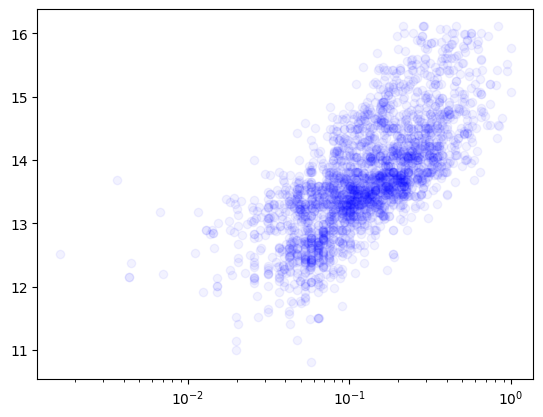

In [65]:


# train_divider = int(len(data) * (4/5))
# y = np.log(data['PRICE'].values)
# TRY = y[:train_divider]
# TEY = y[train_divider:]

X_cont_labels = [
    'PROPERTYSQFT',
    'BEDS',
    'BATH',
    'LATITUDE',
    'LONGITUDE'
]
TRX_cont = []
TEX_cont = []
for label in X_cont_labels:
    x=data[label].values
    mms = MinMaxScaler()
    TRX_cont.append(mms.fit_transform(x[:train_divider].reshape(-1, 1)))
    TEX_cont.append(mms.transform(x[train_divider:].reshape(-1, 1)))

X_cat_labels = [
    'BROKERTITLE',
    'TYPE',
    'ADMINISTRATIVE_AREA_LEVEL_2',
    'LOCALITY',
    'SUBLOCALITY'
]
TRX_cat = []
TEX_cat = []
for label in X_cat_labels:
    x=data[label].values
    ohe = OneHotEncoder(sparse_output=False)
    TRX_cat.append(ohe.fit_transform(x[:train_divider].reshape(-1, 1)))
    TEX_cat.append(ohe.fit_transform(x[train_divider:].reshape(-1, 1)))
    

fig = plt.figure()
ax = plt.gca()
ax.plot(TRX_cont[0], TRY, 'o', c='blue', alpha=0.05)
#ax.set_yscale('log')
ax.set_xscale('log')

Как видим, на логарифмической шкале значения выстраиваются в линиию. Так имеет смысл предсказывать  ln(y)

## 4. Обучить на тренировочном множестве
Аномальное количество квартир с одинаковой площалью вносит существенный вклад в форму графика. Но исключить я их(без вашего позволения) не могу, так каких очень много и они не похожи на ошибку, у всех разные параметры. Возможно это стандартный размер квартиры в нью йорке.

In [66]:
def plot_prediction(x, y, y_pred):
    fig = plt.figure()
    ax = plt.gca()
    ax.plot(x, y, 'o', c='blue', alpha=0.05)
    ax.plot(x, y_pred, 'o', c='red', alpha=0.05)
    #ax.set_yscale('log')
    ax.set_xscale('log')
solutions = []


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

ValueError: Data must be 1-dimensional, got ndarray of shape (2428, 685) instead

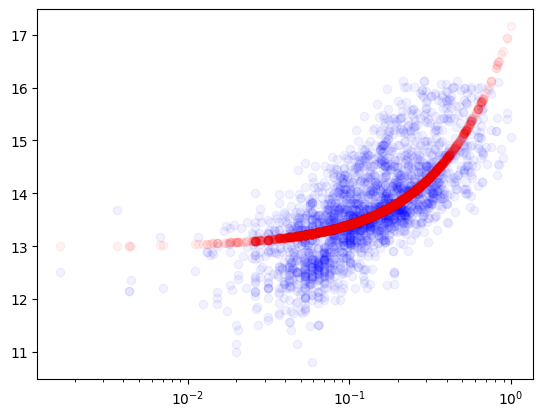

In [73]:
#A Линейная регрессия
from sklearn.linear_model import LinearRegression, LogisticRegression
lire = LinearRegression()
lire.fit(TRX_cont[0].reshape(-1, 1), TRY)
yTR_lire = lire.predict(xTR_scaled.reshape(-1, 1))
plot_prediction(xTR_scaled, yTR, yTR_lire)
solutions.append(("Linear Regression", lire))

cont_models = {}
cont_models["LR"] = []
for e in TRX_cont:
    lr = LinearRegression()
    lr.fit(e.reshape(-1, 1), TRY)
    cont_models["LR"].append(lr)

#pandas get dummies
cat_models = {}
cat_models["LR"] = []
for e in TRX_cat:
    print(e[0])
    dummie = pd.get_dummies(e)
    lr = LinearRegression()
    lr.fit(e.reshape(-1, 1), TRY)
    cat_models["LR"].append(lr)
    


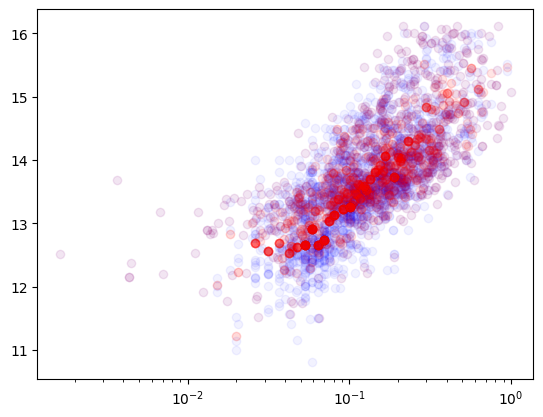

In [38]:
#B Древо решений
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()
DTR.fit(xTR_scaled.reshape(-1, 1), yTR)
yTR_DTR = DTR.predict(xTR_scaled.reshape(-1, 1))
plot_prediction(xTR_scaled, yTR, yTR_DTR)
solutions.append(("Decision Tree Regressor", DTR))

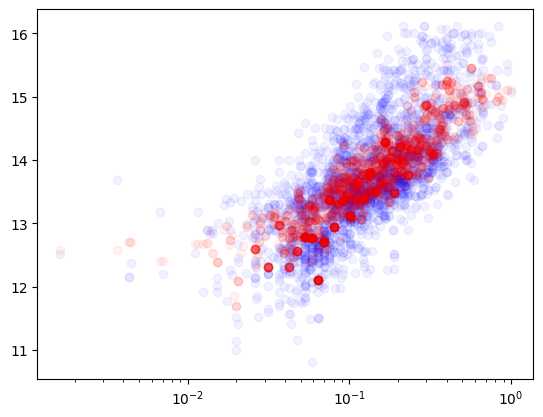

In [39]:
#C k-ближайших соседей
from sklearn.neighbors import KNeighborsRegressor

KNR = KNeighborsRegressor()
KNR.fit(xTR_scaled.reshape(-1, 1), yTR)
yTR_KNR = KNR.predict(xTR_scaled.reshape(-1, 1))
plot_prediction(xTR_scaled, yTR, yTR_KNR)
solutions.append(("K Neighbors Regressor", KNR))

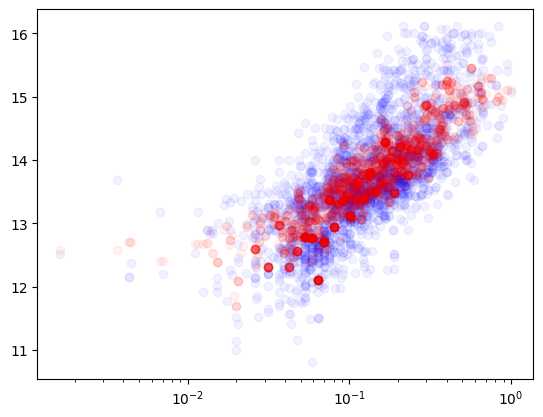

In [40]:
#D Случайный лес
from sklearn.ensemble import RandomForestRegressor

RFR = KNeighborsRegressor()
RFR.fit(xTR_scaled.reshape(-1, 1), yTR)
yTR_RFR = KNR.predict(xTR_scaled.reshape(-1, 1))
plot_prediction(xTR_scaled, yTR, yTR_RFR)
solutions.append(("Random Forest Regressor", RFR))

## 5. Метрики


Linear Regression
	MAE:   0.4872461759012931 0.5039512883529222
	RMSE:  0.6403628103456113 0.6586941378647279
	MAPE:  0.03545878687285585 0.03674688721565346
Decision Tree Regressor
	MAE:   0.5247225956855258 0.2402944607654774
	RMSE:  0.6923895368009816 0.3884177424270598
	MAPE:  0.03806549196584216 0.01773333363938131
K Neighbors Regressor
	MAE:   0.5018351086707146 0.436812671020275
	RMSE:  0.6299948936599321 0.5553510703725402
	MAPE:  0.036376590619632686 0.03176019983922393
Random Forest Regressor
	MAE:   0.5018351086707146 0.436812671020275
	RMSE:  0.6299948936599321 0.5553510703725402
	MAPE:  0.036376590619632686 0.03176019983922393


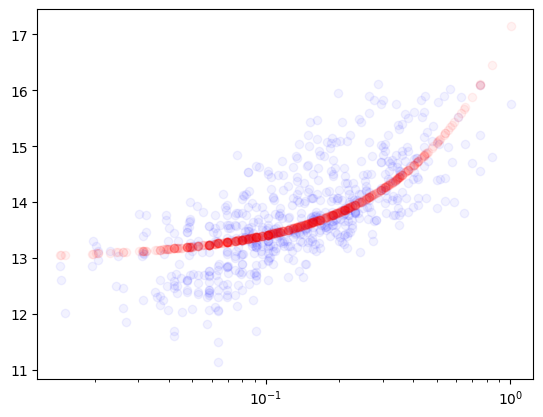

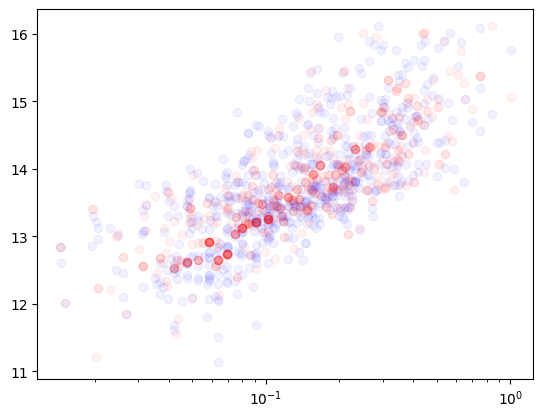

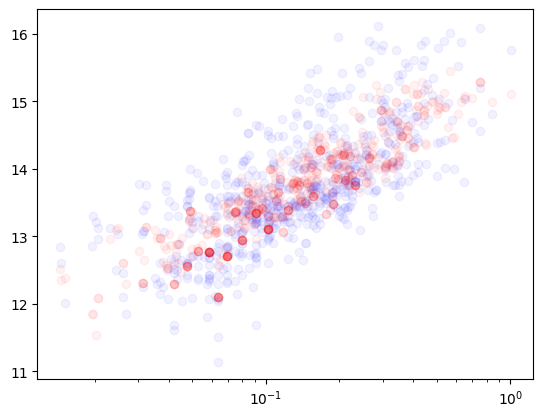

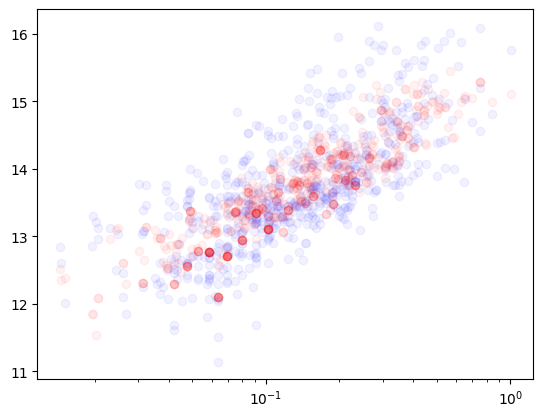

In [41]:
import sklearn.metrics as metrics

#либо я чего-то не понимаю, либо процент ошибки меньше процента
print()
for name, func in solutions:
    print(name)
    yTR_pred = func.predict(xTR_scaled.reshape(-1, 1))
    yTE_pred = func.predict(xTE_scaled.reshape(-1, 1))
    plot_prediction(xTE_scaled, yTE, yTE_pred)
    print("\tMAE:  ", 
          metrics.mean_absolute_error(yTE, yTE_pred),
          metrics.mean_absolute_error(yTR, yTR_pred)
    )
    print("\tRMSE: ", 
          metrics.root_mean_squared_error(yTE, yTE_pred),
          metrics.root_mean_squared_error(yTR, yTR_pred)
    )
    print("\tMAPE: ", 
          metrics.mean_absolute_percentage_error(yTE, yTE_pred),
          metrics.mean_absolute_percentage_error(yTR, yTR_pred)
    )

## 6. Сравнение

Трудно выделить лидера, все модели справились примерно одинаково. Есть признаки незначительного переобучения, о нём свидетельствуют значения ошибок меньшие на тренировочном датасете. Следов недообучения не видно, значения ошибок всё ещё относительно близки. Так же визуально данные хорошо сходятся. Показатели можно улучшить с помощью тонкой настройки глубины дерева, например.